In [38]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
df = pd.read_csv('./data.csv')

In [39]:
df['month'] = df['date'].apply(lambda x:datetime.strptime(x, "%B %Y").month)
df['year'] = df['date'].apply(lambda x:datetime.strptime(x, "%B %Y").year)
df['date'] = df['date'].apply(lambda x:datetime.strptime(x, "%B %Y"))
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5440 entries, 738 to 16
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   5440 non-null   object        
 1   author  5439 non-null   object        
 2   date    5440 non-null   datetime64[ns]
 3   views   5440 non-null   int64         
 4   likes   5440 non-null   int64         
 5   link    5440 non-null   object        
 6   month   5440 non-null   int64         
 7   year    5440 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 382.5+ KB


In [76]:
df

,title,author,date,views,likes,link,month,year
738,Love letters to what we hold dear,Debbie Millman,1970-01-01,192000,5700,https://ted.com/talks/debbie_millman_love_lett...,1,1970
736,Innovations in sleep,Beautyrest,1970-01-01,60000,1800,https://ted.com/talks/beautyrest_innovations_i...,1,1970
4756,Why believe in others,Viktor Frankl,1972-05-01,1300000,41000,https://ted.com/talks/viktor_frankl_why_believ...,5,1972
4813,Physics is fun to imagine,Richard Feynman,1983-07-01,690000,20000,https://ted.com/talks/richard_feynman_physics_...,7,1983
5240,"5 predictions, from 1984",Nicholas Negroponte,1984-02-01,1100000,33000,https://ted.com/talks/nicholas_negroponte_5_pr...,2,1984
...,...,...,...,...,...,...,...,...
26,Can you outsmart the fallacy that divided a na...,Elizabeth Cox,2022-02-01,363000,10000,https://ted.com/talks/elizabeth_cox_can_you_ou...,2,2022
8,What nature can teach us about sustainable bus...,Erin Meezan,2022-02-01,66000,1900,https://ted.com/talks/erin_meezan_what_nature_...,2,2022
6,The myth of Narcissus and Echo,Iseult Gillespie,2022-02-01,412000,12000,https://ted.com/talks/iseult_gillespie_the_myt...,2,2022
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,2,2022


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


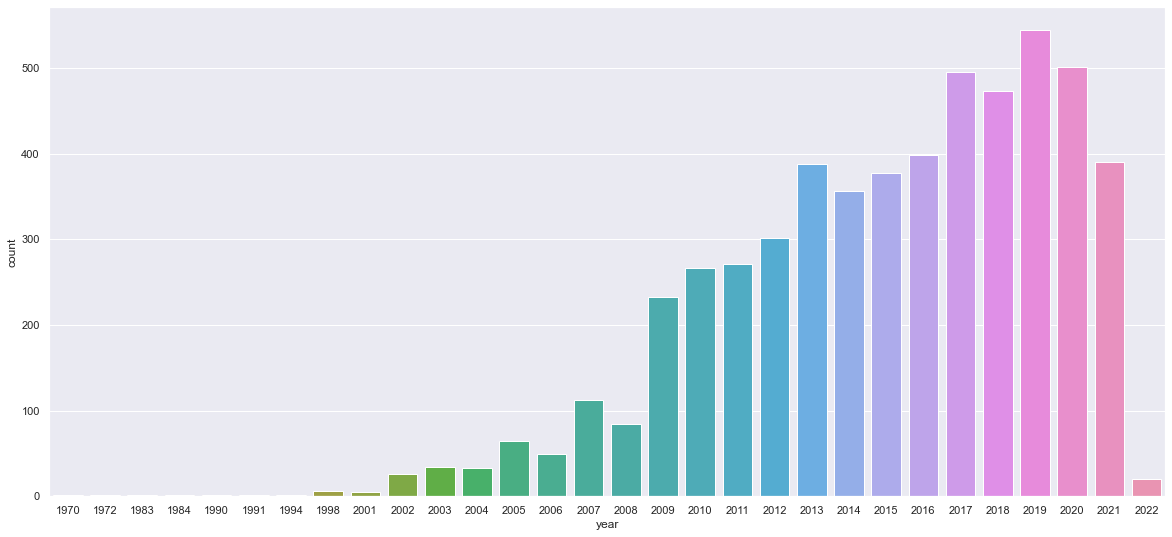

In [48]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,9)})
sns.countplot(df['year'])

plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

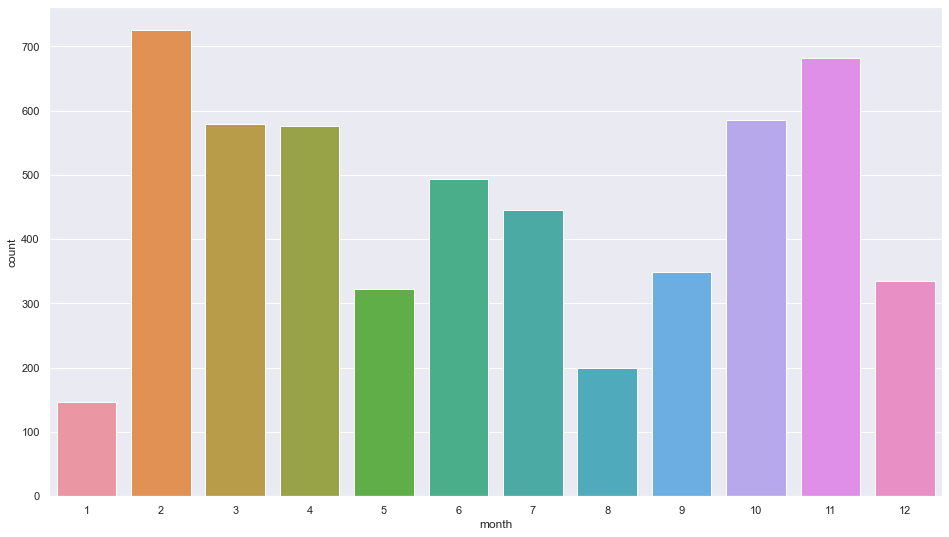

In [49]:
sns.set(rc={'figure.figsize':(16,9)})
sns.countplot(df['month'])

<AxesSubplot:xlabel='date', ylabel='likes'>

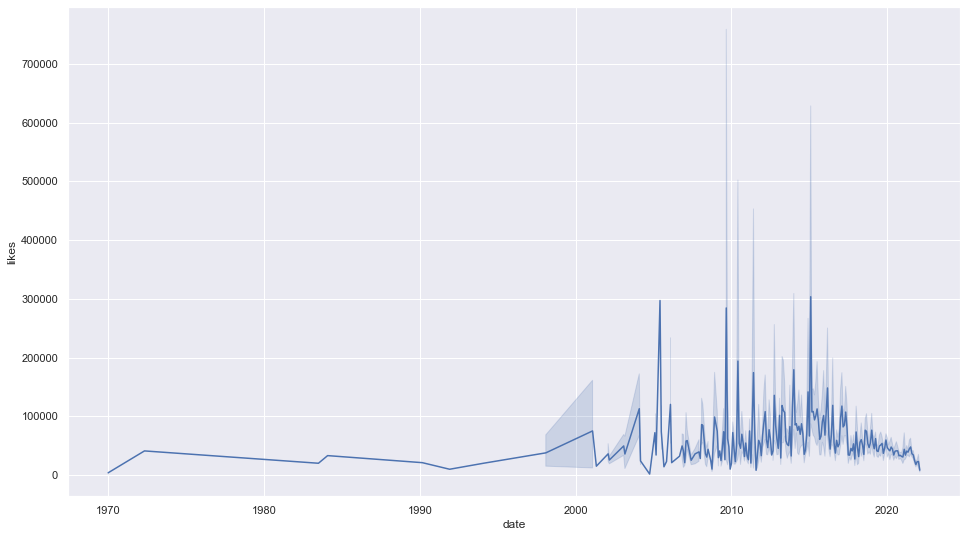

In [50]:
sns.lineplot(x="date", y="likes", data=df)

<AxesSubplot:xlabel='date', ylabel='views'>

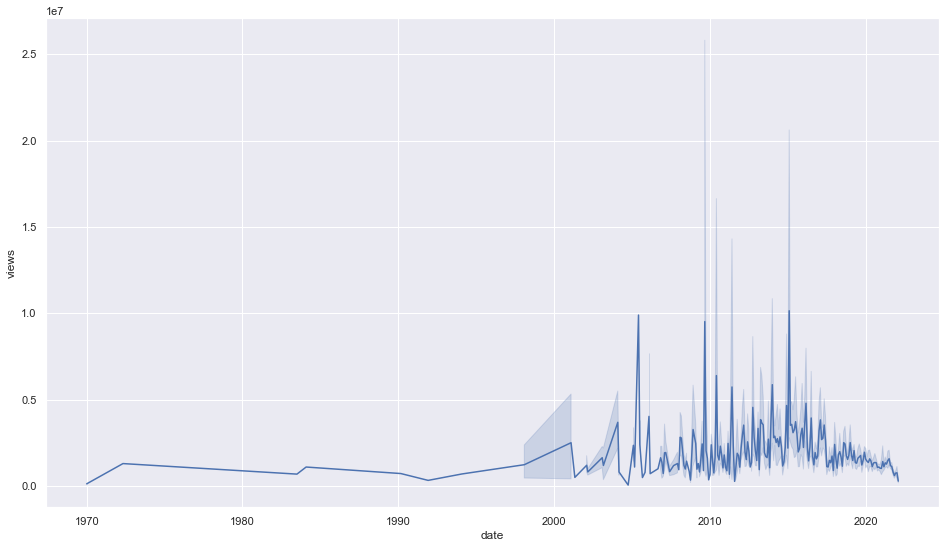

In [51]:
sns.lineplot(x="date", y="views", data=df)

([<matplotlib.patches.Wedge at 0x13d6db040>,
 [Text(0.688278885260481, 0.8580630373723076, 'Alex Gendler'),
  Text(-0.8442089221909705, 0.7052030173596537, 'Iseult Gillespie'),
  Text(-1.0448021582554072, -0.3440762271718918, 'Matt Walker'),
  Text(-0.6179299194168968, -0.9100344030251974, 'Alex Rosenthal'),
  Text(-0.043732228807345584, -1.0991303344751895, 'Elizabeth Cox'),
  Text(0.4856999857510972, -0.986962777333261, 'Emma Bryce'),
  Text(0.8715778621204296, -0.671082729819194, 'Juan Enriquez'),
  Text(1.073793924645897, -0.23867678436237116, 'Daniel Finkel')],
 [Text(0.37542484650571684, 0.46803438402125863, '28.5%'),
  Text(-0.4604775939223475, 0.3846561912870838, '20.9%'),
  Text(-0.5698920863211312, -0.18767794209375913, '11.4%'),
  Text(-0.33705268331830734, -0.49638240165010766, '9.5%'),
  Text(-0.023853942985824862, -0.599525636986467, '8.2%'),
  Text(0.2649272649551439, -0.5383433330908696, '7.6%'),
  Text(0.4754061066111434, -0.366045125355924, '7.0%'),
  Text(0.585705777

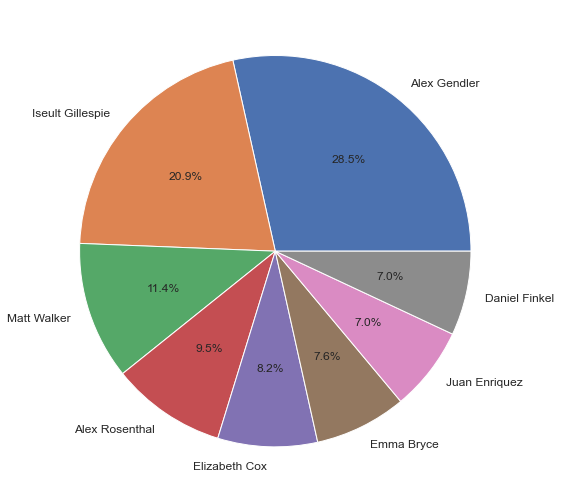

In [75]:
tmp = df['author'].value_counts(sort=True).reset_index(name="count").query("count>10")

plt.pie(tmp['count'],                           # 數值
        labels = tmp['index'],                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12})  # 文字大小

<AxesSubplot:xlabel='month', ylabel='year'>

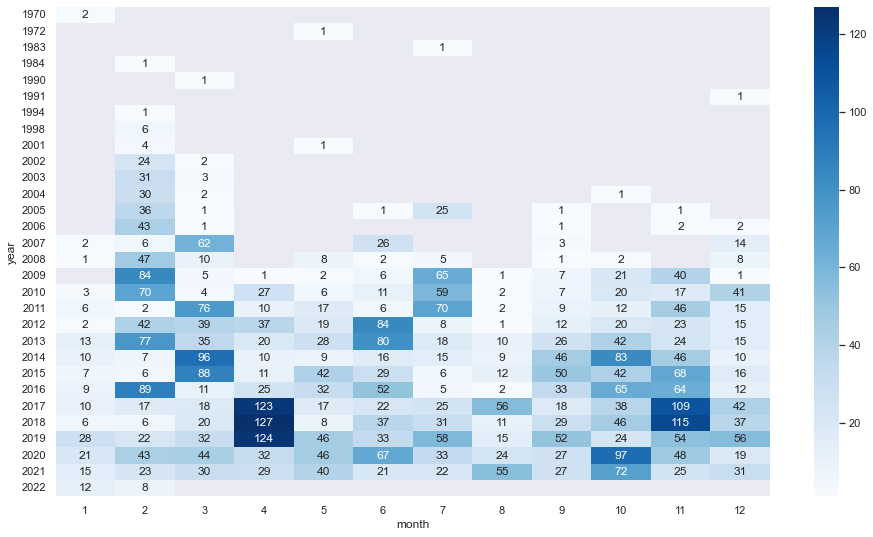

In [96]:
sns.heatmap(year_month.pivot("year", "month", "counts"), annot=True, cmap="Blues", fmt='g')

In [91]:
year_month.pivot("year", "month", "counts")

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1970,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1984,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1994,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [82]:
year_month = df.groupby(["year","month"]).size().reset_index(name='counts')

In [83]:
year_month

,year,month,counts
0,1970,1,2
1,1972,5,1
2,1983,7,1
3,1984,2,1
4,1990,3,1
...,...,...,...
195,2021,10,72
196,2021,11,25
197,2021,12,31
198,2022,1,12
